In [1]:
#导入包
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#logistic loss函数
def logistic_loss(X,w,y):
    if(y.shape[0]!=X.shape[0]):
        raise "y和X长度不同"
    if(X.shape[1]!=w.shape[0]):
        raise "X的列数与w的长度不同"
    single_loss = np.log(1 + np.exp(-y * X.dot(w)))
    return single_loss.mean()
#logistic 梯度
def logistic_gradient(X,w,y):
    if(y.shape[0]!=X.shape[0]):
        raise "y和X长度不同"
    if(X.shape[1]!=w.shape[0]):
        raise "X的列数与w的长度不同"
    denominator = 1 + np.exp(y * X.dot(w))
    numerator = y.reshape(-1,1) * X
    single_gradient = -numerator / denominator.reshape(-1,1)
    return np.mean(single_gradient,axis=0)
#logistic 准确率
def logistic_accuracy(X,w,y):
    if(y.shape[0]!=X.shape[0]):
        raise "y和X长度不同"
    if(X.shape[1]!=w.shape[0]):
        raise "X的列数与w的长度不同"
    single_predict = (y * X.dot(w)) > 0
    return single_predict.mean()
#SVM 梯度
def SVM_gradient(X,w,y,C):
    if(y.shape[0]!=X.shape[0]):
        raise "y和X长度不同"
    if(X.shape[1]!=w.shape[0]):
        raise "X的列数与w的长度不同"
    single_grad = -y.reshape(-1,1) * X
    hinge = 1 - y * X.dot(w)
    single_grad[hinge <= 0] = 0
    w_pure = np.append(w[:-1],0)
    return w_pure + C * single_grad.mean(axis=0)
#SVM loss 函数
def SVM_loss(X,w,y,C):
    if(y.shape[0]!=X.shape[0]):
        raise "y和X长度不同"
    if(X.shape[1]!=w.shape[0]):
        raise "X的列数与w的长度不同"
    hinge = 1 - y * X.dot(w)
    hinge[hinge<0] = 0
    return 0.5 * w.dot(w) + C * hinge.mean()
#SVM 准确率
def SVM_accuracy(X,w,y):
    if(y.shape[0]!=X.shape[0]):
        raise "y和X长度不同"
    if(X.shape[1]!=w.shape[0]):
        raise "X的列数与w的长度不同"
    single_predict = (y * X.dot(w)) > 0
    return single_predict.mean()

In [3]:
#读取数据
X_train,y_train = load_svmlight_file('a9a.txt',n_features=123)
X_train = X_train.toarray()
X_validation,y_validation = load_svmlight_file('a9a.t',n_features=123)
X_validation = X_validation.toarray()
#为X添加一维值为 1 的特征，误差计算变为 y - Xw,方便运算
train_ones = [[1]]*X_train.shape[0]
validation_ones = [[1]]*X_validation.shape[0]
X_train = np.concatenate((X_train,train_ones),axis=1)
X_validation = np.concatenate((X_validation,validation_ones),axis=1)
#参数初始化
w = np.random.randn(X_train.shape[1])
batch_size = 100
training_step = 5000
learning_rate = 0.01
C = 1

训练集准确率0.826234
验证集准确率0.827222


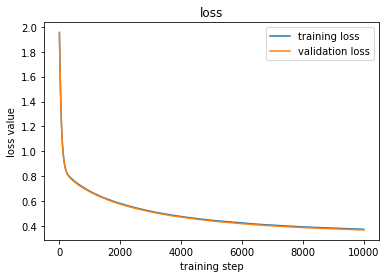

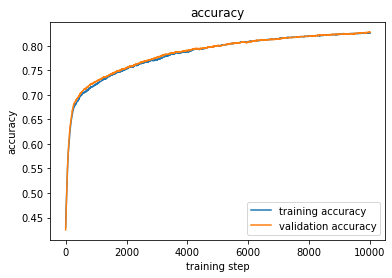

In [4]:
#----------------逻辑回归与批量随机梯度下降------------------
#参数初始化
w = np.random.randn(X_train.shape[1])
batch_size = 100
training_step = 10000
learning_rate = 0.01
#循环mini-batch 随机梯度下降
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []
for i in range(training_step):
    #随机选取批次
    random_index = np.random.randint(0,X_train.shape[0],batch_size)
    batch_x = X_train[random_index]
    batch_y = y_train[random_index]
    #loss值和准确率
    training_loss.append(logistic_loss(X_train,w,y_train))
    validation_loss.append(logistic_loss(X_validation,w,y_validation))
    training_accuracy.append(logistic_accuracy(X_train,w,y_train))
    validation_accuracy.append(logistic_accuracy(X_validation,w,y_validation))
    #梯度更新
    w -= learning_rate * logistic_gradient(batch_x,w,batch_y)
print('训练集准确率%f'%training_accuracy[-1])
print('验证集准确率%f'%validation_accuracy[-1])
#绘图
plt.title('loss')
plt.xlabel('training step')
plt.ylabel('loss value')
plt.plot(range(training_step),training_loss,label='training loss')
plt.plot(range(training_step),validation_loss,label='validation loss')
plt.legend(loc = "best")
plt.show()
plt.title('accuracy')
plt.xlabel('training step')
plt.ylabel('accuracy')
plt.plot(range(training_step),training_accuracy,label='training accuracy')
plt.plot(range(training_step),validation_accuracy,label='validation accuracy')
plt.legend(loc = "best")
plt.show()

训练集准确率0.759190
验证集准确率0.763774


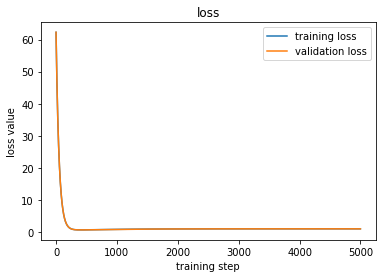

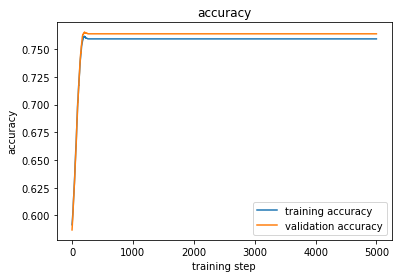

In [6]:
#-----------------线性分类与批量随机梯度下降--------------------
#参数初始化
w = np.random.randn(X_train.shape[1])
batch_size = 100
training_step = 5000
learning_rate = 0.01
C = 1
#循环mini-batch 随机梯度下降
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []
for i in range(training_step):
    #随机选取批次
    random_index = np.random.randint(0,X_train.shape[0],batch_size)
    batch_x = X_train[random_index]
    batch_y = y_train[random_index]
    #loss值和准确率
    training_loss.append(SVM_loss(X_train,w,y_train,C))
    validation_loss.append(SVM_loss(X_validation,w,y_validation,C))
    training_accuracy.append(SVM_accuracy(X_train,w,y_train))
    validation_accuracy.append(SVM_accuracy(X_validation,w,y_validation))
    #梯度更新
    w -= learning_rate * SVM_gradient(batch_x,w,batch_y,C)
print('训练集准确率%f'%training_accuracy[-1])
print('验证集准确率%f'%validation_accuracy[-1])
#绘图
plt.title('loss')
plt.xlabel('training step')
plt.ylabel('loss value')
plt.plot(range(training_step),training_loss,label='training loss')
plt.plot(range(training_step),validation_loss,label='validation loss')
plt.legend(loc = "best")
plt.show()
plt.title('accuracy')
plt.xlabel('training step')
plt.ylabel('accuracy')
plt.plot(range(training_step),training_accuracy,label='training accuracy')
plt.plot(range(training_step),validation_accuracy,label='validation accuracy')
plt.legend(loc = "best")
plt.show()